## Decomposition

In [16]:
from decomposition import *

A = decompose_A_matrix(3)

dict_to_operator(A, 3)


Operator([[ 2.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [-1.+0.j,  2.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  2.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j,  2.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  2.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  2.+0.j, -1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  2.+0.j,
           -1.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
            2.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


# b state

state vector: (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x10f23aa50>, Statevector([0.01855323+0.j, 0.02618002+0.j, 0.03610359+0.j,
             0.04865873+0.j, 0.0640916 +0.j, 0.08250332+0.j,
             0.10379387+0.j, 0.12761508+0.j, 0.15334239+0.j,
             0.18007459+0.j, 0.2066677 +0.j, 0.23180497+0.j,
             0.25409895+0.j, 0.27221557+0.j, 0.28500535+0.j,
             0.29162385+0.j, 0.29162385+0.j, 0.28500535+0.j,
             0.27221557+0.j, 0.25409895+0.j, 0.23180497+0.j,
             0.2066677 +0.j, 0.18007459+0.j, 0.15334239+0.j,
             0.12761508+0.j, 0.10379387+0.j, 0.08250332+0.j,
             0.0640916 +0.j, 0.04865873+0.j, 0.03610359+0.j,
             0.02618002+0.j, 0.01855323+0.j],
            dims=(2, 2, 2, 2, 2)), array([0.01855323, 0.02618002, 0.03610359, 0.04865873, 0.0640916 ,
       0.08250332, 0.10379387, 0.12761508, 0.15334239, 0.18007459,
       0.2066677 , 0.23180497, 0.25409895, 0.27221557, 0.28500535,
       0.29162385, 0.29

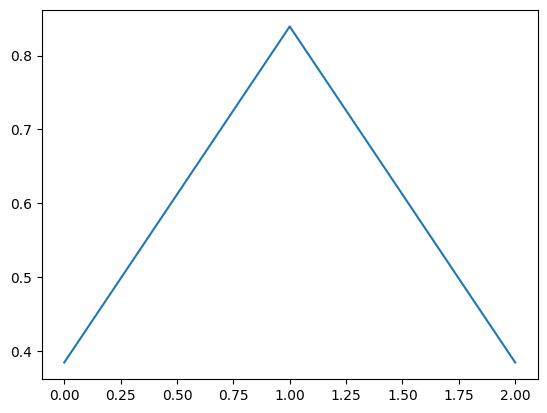

In [1]:
from create_b_state import *
import matplotlib.pyplot as plt

#test

b = create_b_vector_gaussian(3)
b1 = create_b_vector_linear(40)
b2 = create_b_vector_sine(40)

stateV = get_b_statevector(5)



print("state vector:", stateV)
plt.plot(b, label='Gaussian')


# Ansatz

num of parameters : 2 = 2 * 1


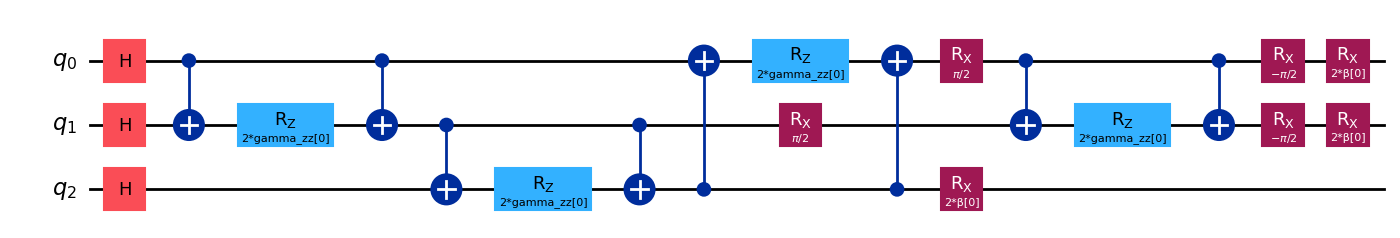

In [2]:
from Ansatz import create_qaoa_ansatz as create_ansatz
L = 1
ansatz = create_ansatz(3, L)
print("num of parameters :", ansatz.num_parameters, '= 2 * {}'.format(L))
ansatz.draw('mpl')


# VQE Solver

In [5]:
from To_Hermite_Operator import get_hermitian_observable

get_hermitian_observable('I+')  # 예시 호출

SparsePauliOp(['XIX', 'YIY'],
              coeffs=[0.5+0.j, 0.5+0.j])

In [14]:
get_hermitian_observable('+I-')  # 예시 호출

SparsePauliOp(['XXIX', 'XYIY', 'YXIY', 'YYIX'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])

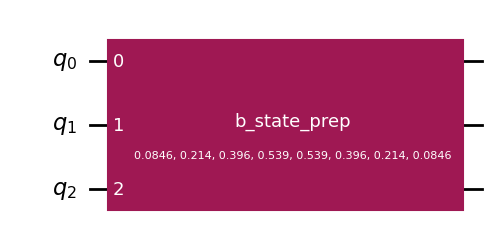

In [7]:
from create_b_state import get_b_statevector

b = get_b_statevector(3)
b[0].draw('mpl')  # b 상태 벡터를 그립니다.

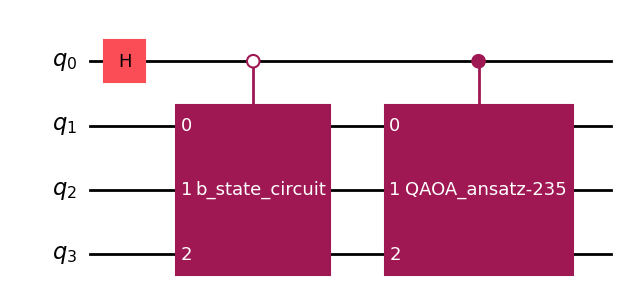

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.primitives import StatevectorEstimator as Estimator  # Aer 대신 기본 Estimator 사용
from qiskit.circuit.library import RYGate
from create_b_state import get_b_statevector
from Ansatz import create_qaoa_ansatz as create_ansatz


ansatz = create_ansatz(3, 1)  # 예시로 3개의 큐빗과 1개의 레이어를 갖는 QAOA 안사츠 생성 -> 파라미터는 2개
b_state = get_b_statevector(3)[0]  # 예시로 3개의 큐빗에 대한 |b⟩ 상태 벡터를 가져옴

# --- 핵심 구현 함수 (Core Implementation Functions) ---

def create_b_psi_circuit(
    b_circuit: QuantumCircuit,
    psi_ansatz: QuantumCircuit,
    theta_value: list[float]
) -> QuantumCircuit:
    """
    이미지 속 수식 |b, ψ(θ)⟩ = (1/√2)[|0⟩|b⟩ + |1⟩|ψ(θ)⟩] 상태를
    생성하는 양자 회로를 구현합니다.

    Args:
        b_circuit (QuantumCircuit): |b⟩ 상태를 만드는 회로 (U_b).
        psi_ansatz (QuantumCircuit): |ψ(θ)⟩ 상태를 만드는 파라미터화된 회로 (U_ψ).
        theta_value (float): 안사츠에 할당할 파라미터 값.

    Returns:
        QuantumCircuit: 최종 중첩 상태를 생성하는 회로.
    """
    num_main_qubits = b_circuit.num_qubits
    
    # 1개의 보조 큐빗(ancilla)과 n개의 주 큐빗(main)으로 구성된 회로 생성
    final_circuit = QuantumCircuit(num_main_qubits + 1)
    main_qubits = list(range(1, num_main_qubits + 1))
    ancilla_qubit = 0

    # 1. 보조 큐빗에 Hadamard 게이트를 적용하여 |+⟩ 상태로 만듭니다.
    final_circuit.h(ancilla_qubit)

    # 2. 제어된 U_b 연산을 적용합니다.
    controlled_Ub = b_circuit.to_gate().control(1, ctrl_state=0)
    final_circuit.append(controlled_Ub, [ancilla_qubit] + main_qubits)

    # 3. 제어된 U_ψ 연산을 적용합니다.
    psi_circuit = psi_ansatz.assign_parameters(theta_value)
    controlled_Upsi = psi_circuit.to_gate().control(1, ctrl_state=1)
    final_circuit.append(controlled_Upsi, [ancilla_qubit] + main_qubits)

    return final_circuit


ans = create_b_psi_circuit(
    b_circuit= b_state,
    psi_ansatz=ansatz,
    theta_value= [0.1, 0.2]
    ) 

ans.draw('mpl')


Select the function to generate vector b:
  1: Gaussian
  2: Sine
  3: Uniform
  4: Random
  5: Linear

Select the VQE solver to use:
  1: Statevector Solver (fast, exact simulation)
  2: Estimator Primitive (slower, simulates backend execution)
  3: paper-style cost: <psi|B|psi>-<psi|C|psi>-|<b|A|psi>|^2

VQE 최적화 시작 (파라미터 수: 2)...
Iteration  193: Cost = -1.51130738
최적화 완료.

VQE Final Results (4-qubit, 1-layer, b-func: Gaussian, Solver: Paper-style Cost Solver)
▷ Minimum Cost (Functional Value): -1.51130744
▷ Fidelity with classical solution: 0.86648670  (Ideal = 1.0)


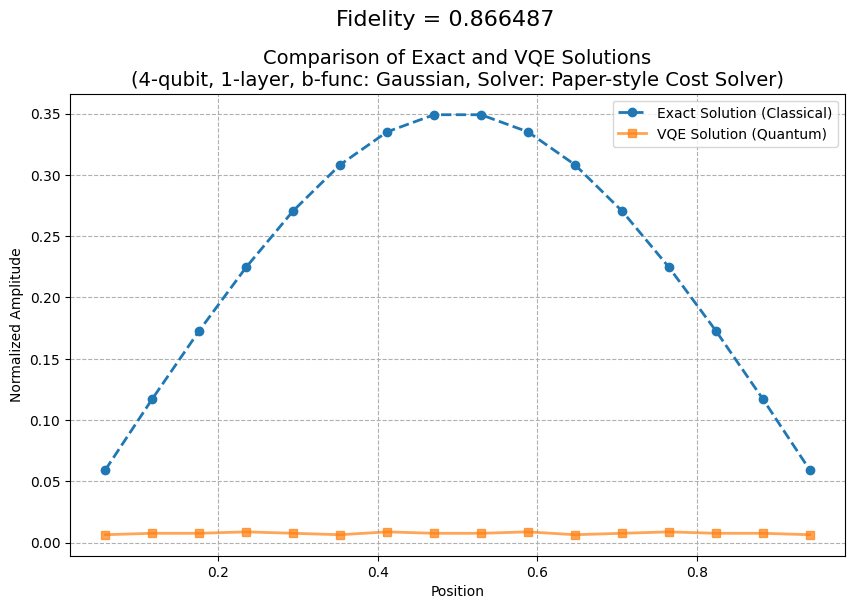

In [9]:
%run main.py

In [12]:
%run analysis_plotter.py

Starting VQE Fidelity vs. Layers Analysis
Qubit Counts to Test: [2, 3, 4]
Layer Counts to Test: [1, 2, 3]

[INFO] Running simulations for 2 qubits...

VQE 최적화 시작 (파라미터 수: 2)...
Iteration   37: Cost = -1.75344832
최적화 완료.
  -> 2 Qubits, 1 Layers: Fidelity = 0.805463 (took 2.42 s)

VQE 최적화 시작 (파라미터 수: 4)...
Iteration   56: Cost = -3.43942452
최적화 완료.
  -> 2 Qubits, 2 Layers: Fidelity = 0.035981 (took 4.16 s)

VQE 최적화 시작 (파라미터 수: 6)...
Iteration   67: Cost = -3.43942457
최적화 완료.
  -> 2 Qubits, 3 Layers: Fidelity = 0.036012 (took 5.72 s)

[INFO] Running simulations for 3 qubits...

VQE 최적화 시작 (파라미터 수: 2)...
Iteration   48: Cost = -1.56452351
최적화 완료.
  -> 3 Qubits, 1 Layers: Fidelity = 0.847629 (took 5.57 s)

VQE 최적화 시작 (파라미터 수: 4)...
Iteration   88: Cost = -1.56455815
최적화 완료.
  -> 3 Qubits, 2 Layers: Fidelity = 0.847373 (took 12.22 s)

VQE 최적화 시작 (파라미터 수: 6)...


KeyboardInterrupt: 